In [1]:
import numpy as np
import apss_lib
import ppplot
%matplotlib inline

2019-12-14 00:07:58.813149


In [2]:
def regf(x,a,b):
    return a * (x**b)
import scipy.optimize as sciopt

- sols 145 to 151 included have afternoon data at 10 Hz
- sols 168 to 207 included have afternoon data at 10 Hz

APSS_LIB: ---------- GETDATA ----------
APSS_LIB: using existing local Python binary file: /home/aspiga/data/InSight/npy//ps_calib_0168_01.npy
APSS_LIB: ---------- GETDATA ----------
APSS_LIB: using existing local Python binary file: /home/aspiga/data/InSight/npy//ps_calib_0169_01.npy
APSS_LIB: ---------- GETDATA ----------
APSS_LIB: using existing local Python binary file: /home/aspiga/data/InSight/npy//ps_calib_0170_01.npy
APSS_LIB: ---------- GETDATA ----------
APSS_LIB: using existing local Python binary file: /home/aspiga/data/InSight/npy//ps_calib_0171_01.npy
APSS_LIB: ---------- GETDATA ----------
APSS_LIB: using existing local Python binary file: /home/aspiga/data/InSight/npy//ps_calib_0172_01.npy
APSS_LIB: ---------- GETDATA ----------
APSS_LIB: using existing local Python binary file: /home/aspiga/data/InSight/npy//ps_calib_0173_01.npy
APSS_LIB: ---------- GETDATA ----------
APSS_LIB: using existing local Python binary file: /home/aspiga/data/InSight/npy//ps_calib_0174_01.npy

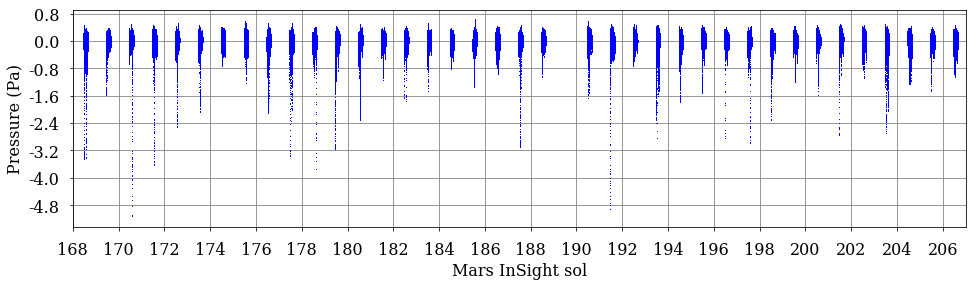

In [3]:
solini = 145 ; solsol = 8
solini = 168 ; solsol = 40
swin = 2000 # not lower to retain convective cells
freq = 10
inter = [13,15]
inter = [11,16] # afternoon hours
field, coord = apss_lib.multisol(pds=True,solini=solini,solsol=solsol,code="PRE",freq=freq,win=swin,detrend=True,compute=None,ttinter=[inter])

In [4]:
sp,fq = apss_lib.spectra(field,freq)
fqmin = 20./swin
fqmax = freq/4.

resultat a=8.813e-05 et b=-1.699


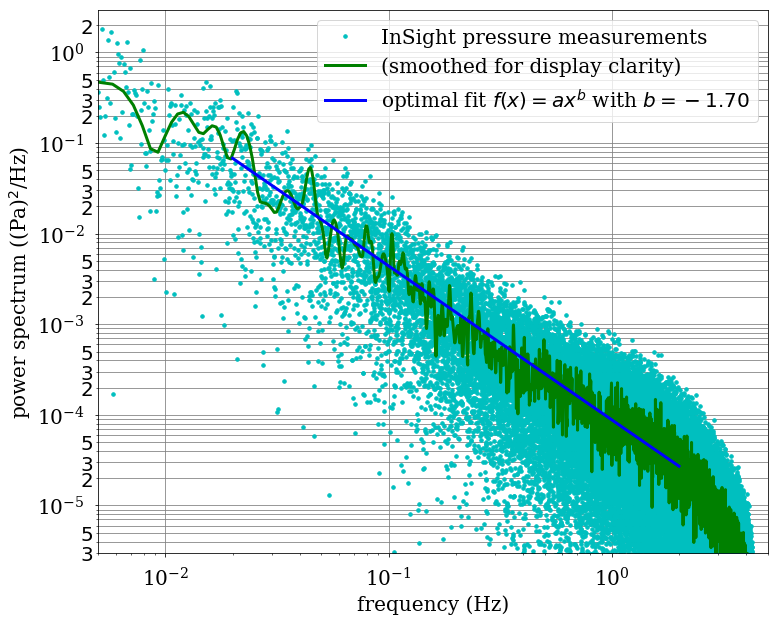

In [5]:
unipp, fchar = "Pa", "pressure"
decades_up_down, smth = 3, 10 #30
#fqinterv = [(10**-2,10**-0),(10**-1,10**+1)]
#fqinterv = [(10**-2,10**-1),(10**-1,10**+0)]
fqinterv = [(2*10**-2,2.0)]
######################################
##### GENERIC SETTINGS
fig = ppplot.figuref(x=12,y=10)
ppplot.changefont(20)
ppplot.changelinewidth(3)
pl = ppplot.plot1d(fig=fig)
pl.logx = pl.logy = True
pl.ylabel = r'power spectrum ((%s)$^2$/Hz)' % (unipp)
pl.xlabel = "frequency (Hz)"
pl.xmin, pl.xmax = fqmin/2, fqmax*2
######################################
##### FIELD
nn = 50 # 10 # less points to produce a lighter figure
pl.f, pl.x = sp[::nn],fq[::nn]
yoyy = 10.**decades_up_down
pl.ymin, pl.ymax = np.mean(pl.f)/yoyy, np.mean(pl.f)*yoyy
pl.linestyle, pl.marker, pl.color = "", ".", "c"
pl.legend = "InSight pressure measurements"
pl.make()
######################################
##### SMOOTH
##### (when lots of points, smooth is not correct)
nn = 500
hid, pl.f = apss_lib.detrendsmooth(sp[::nn],smth)
hid, pl.x = apss_lib.detrendsmooth(fq[::nn],smth)
pl.legend = "(smoothed for display clarity)"
pl.linestyle, pl.marker, pl.color = "-", "", "g"
pl.make()
######################################
#### EXPONENT FITS
for fqi,fqa in fqinterv:
    #####################
    idx = (fq > fqi)*(fq < fqa) ; w = np.where(idx)
    xx = fq[w] ; yy = sp[w]   
    param,cov = sciopt.curve_fit(regf,xx,yy)
    a_opt = param[0] ; b_opt = param[1]
    print u'resultat a=%.3e et b=%.3f' % (a_opt,b_opt)
    #####################
    pl.f = regf(xx,a_opt,b_opt)
    pl.x = xx
    pl.marker, pl.color = "", "b" #"k"
    pl.legend = 'optimal fit $f(x) = a x^b$ with $b=%4.2f$' % (b_opt)
    pl.make()
    if pl.linestyle == "-": pl.linestyle = "--"
ppplot.save(filename="spectra_multisol",mode="pdf")